In [134]:
import numpy as np
import matplotlib.pyplot as plt
import msprime

In [135]:
def plot_num_branches(sample_size, seed=None):
    ts = msprime.sim_ancestry(samples=sample_size, ploidy=1, random_seed=seed)
    times = [node.time for node in ts.nodes() if node.time > 0]

    # plot step function
    times = np.array([0] + times)
    levels = list(reversed(range(1, sample_size+1)))
    plt.step(np.sort(times), np.array(list(levels)), where='post')
    plt.ylim(0, sample_size + 1)
    plt.xlim(0, times[-1])


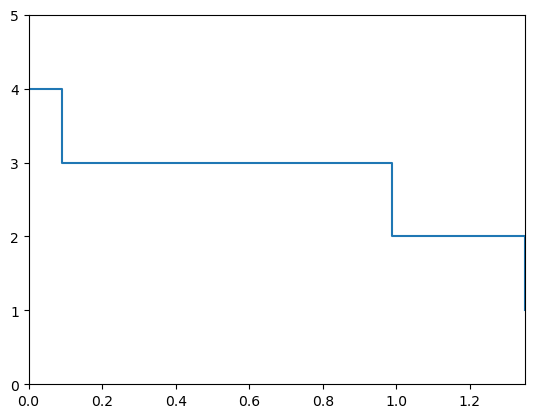

In [136]:
plot_num_branches(4, seed=1)

In [137]:
def branch_length(sample_size, seed=None):
    n = sample_size
    ts = msprime.sim_ancestry(samples=n, ploidy=1, random_seed=seed)
    times = np.array([0.0] + [node.time for node in ts.nodes() if node.time > 0])
    cum_times = np.cumsum(times)
    bl = [cum_times[i] + (n-i) * times[i] for i in range(len(times))]
    return times, bl


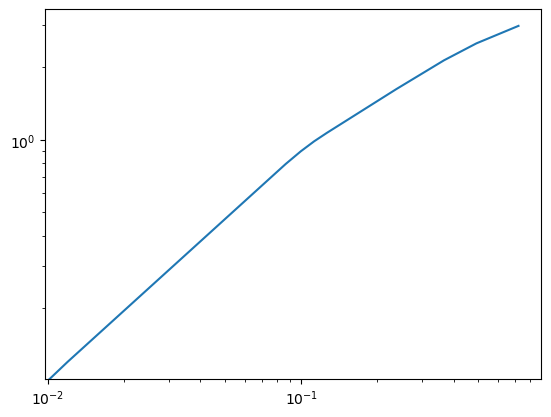

In [141]:
x,y = branch_length(10, seed=1)
plt.xscale('log')
plt.yscale('log')
plt.plot(x, y)